# Homework 3: Schelling model
by Rustam Guseyn-zade ([link canvas](https://skoltech.instructure.com/courses/3546/users/9673))

## Table of contents
* [Randomize the map with half white/half black](#Randomize-the-map-with-half-white/half-black)
* [GIFs for different R](#GIFs-for-different-R)
    * [R = 0](#R-=-0)
    * [R = 1/8](#R-=-$\frac{1}{8}$)
    * [R = 2/8](#R-=-$\frac{2}{8}$)
    * [R = 3/8](#R-=-$\frac{3}{8}$)
    * [R = 4/8](#R-=-$\frac{4}{8}$)
    * [R = 5/8](#R-=-$\frac{5}{8}$)
    * [R = 6/8](#R-=-$\frac{6}{8}$)
    * [R = 7/8](#R-=-$\frac{7}{8}$)
    * [R = 1](#R-=-1)
* [Households that want to move versus time](#Households-that-want-to-move-versus-time)

In [1]:
# import needed libraries
import glob
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib.cm as cm
import os
from PIL import Image
import random

## Randomize the map with half white/half black

In [2]:
def pixels_map(fig_width, fig_height, zoom):
    width = fig_width * zoom
    height = fig_height * zoom
    plain_map = np.zeros(height * width)
    plain_map[:int((width * height) / 2)] = 1
    plain_map = np.random.permutation(plain_map)
    pixels = np.zeros((height, width))
    for i in range(height):
        pixels[i] = plain_map[i*width:(i+1)*width]
    return pixels

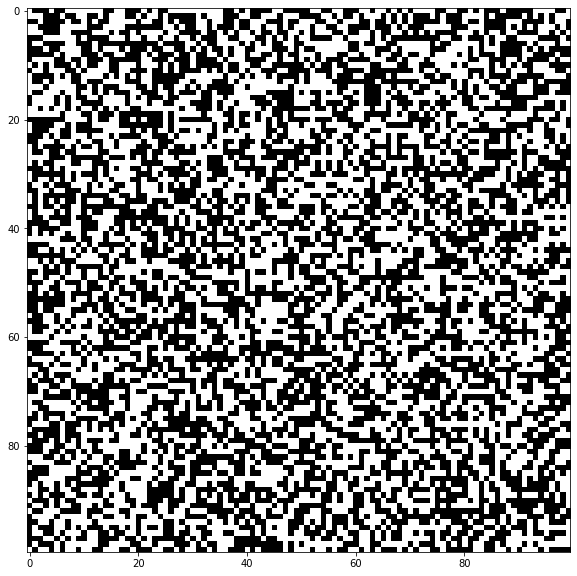

In [3]:
fig_width, fig_height = (10, 10)
pixels = pixels_map(fig_width, fig_height, 10)
fig, ax = plt.subplots()
fig.set_size_inches(fig_width, fig_height, forward=True)
ax.imshow(pixels, cmap='gray')

## GIFs for different R

In [4]:
def relocation(origin_map, R):
    height = len(origin_map)
    width = len(origin_map[0])
    unsatisfied_group_x = np.array([])
    unsatisfied_group_y = np.array([])
    for i in range(height):
        for j in range(width):
            square_colour = origin_map[i][j]
            neighbours_same_colour = 0
            neighbours = 0
            
            # sorry for boilerplate code
            if i < height - 1:
                neighbours_same_colour += int(origin_map[i+1][j] == square_colour)
                neighbours +=1
                if j < width - 1:
                    neighbours_same_colour += int(origin_map[i+1][j+1] == square_colour)
                    neighbours +=1
                if j > 0:
                    neighbours_same_colour += int(origin_map[i+1][j-1] == square_colour)
                    neighbours +=1
            if i > 0:
                neighbours_same_colour += int(origin_map[i-1][j] == square_colour)
                neighbours +=1
                if j < width - 1:
                    neighbours_same_colour += int(origin_map[i-1][j+1] == square_colour)
                    neighbours +=1
                if j > 0:
                    neighbours_same_colour += int(origin_map[i-1][j-1] == square_colour)
                    neighbours +=1
            if j < width - 1:
                neighbours_same_colour += int(origin_map[i][j+1] == square_colour)
                neighbours +=1
            if j > 0:
                neighbours_same_colour += int(origin_map[i][j-1] == square_colour)
                neighbours +=1
            
            # "satisfied" criteria
            if (neighbours_same_colour / neighbours) < R:
                unsatisfied_group_y = np.append(unsatisfied_group_y, j)
                unsatisfied_group_x = np.append(unsatisfied_group_x, i)

    unsatisfied_group_count = len(unsatisfied_group_y)
    unsatisfied_group = [(int(unsatisfied_group_y[i]), int(unsatisfied_group_x[i])) for i in range(unsatisfied_group_count)]
    relocated_unsatisfied_group = np.random.permutation(unsatisfied_group)
    
    new_map = origin_map.copy()
    for i in range(unsatisfied_group_count):
        new_map[relocated_unsatisfied_group[i][0]][relocated_unsatisfied_group[i][1]] = origin_map[unsatisfied_group[i][0]][unsatisfied_group[i][1]]
    
    return new_map, unsatisfied_group_count     

In [5]:
gif_duration = 100

In [6]:
def evolution_animation(iterations, R):
    unsatisfied = np.array([])
    fig_width, fig_height = (10, 10)
    pixels = pixels_map(fig_width, fig_height, 10)
    fig, ax = plt.subplots()
    fig.set_size_inches(fig_width, fig_height, forward=True)
    ax.imshow(pixels, cmap='gray')
    plt.savefig('map_' + '{0:05}'.format(0) + '.png')

    for i in range(1, iterations):
        pixels, current_unsatisfied = relocation(pixels, R)
        unsatisfied = np.append(unsatisfied, current_unsatisfied)
        print("[%-50s] %d%%" % ('='* int(i * 50 / (iterations-1)) , int(i * 100 / (iterations-1))), end='\r')
        ax.imshow(pixels, cmap='gray')
        plt.savefig('map_' + '{0:05}'.format(i) + '.png')
    
    fp_in = "map_*.png"
    fp_out = f"schelling_{'{:.4f}'.format(R)}.gif"

    img, *imgs = [Image.open(f) for f in sorted(glob.glob(fp_in))]
    img.save(fp=fp_out, format='GIF', append_images=imgs, save_all=True, duration=gif_duration, loop=0)
    
    for filePath in sorted(glob.glob(fp_in)):
        try:
            os.remove(filePath)
        except:
            print("Error while deleting file : ", filePath)
            
    print(f"Animation of map evolution for R = {'{:.4f}'.format(R)} saved in file {fp_out}")
    return unsatisfied

For the further task we create dictionary mapping R to array for numbers of unsatisfied agents 

In [7]:
unsatisfied_R = {}
iterations = 200

### R = 0

Animation of map evolution for R = 0.0000 saved in file schelling_0.0000.gif


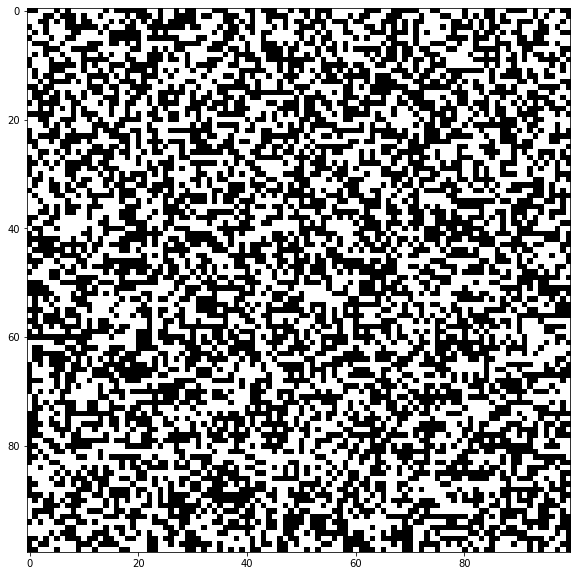

In [8]:
unsatisfied_R[0] = evolution_animation(iterations, 0)

### R = $\frac{1}{8}$

Animation of map evolution for R = 0.1250 saved in file schelling_0.1250.gif


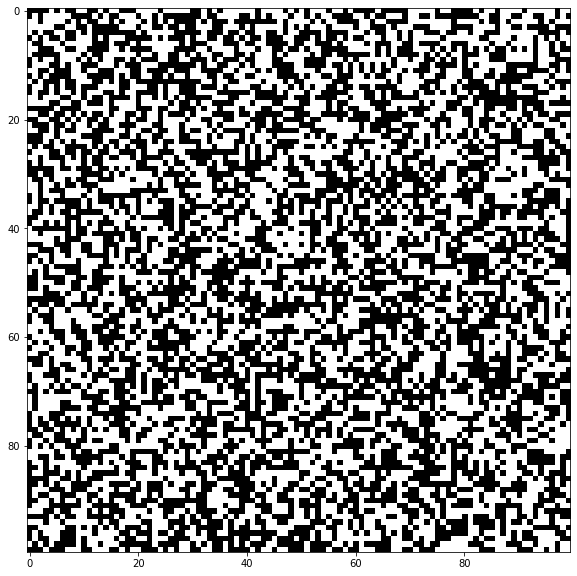

In [9]:
unsatisfied_R[1] = evolution_animation(iterations, 1/8)

### R = $\frac{2}{8}$

Animation of map evolution for R = 0.2500 saved in file schelling_0.2500.gif


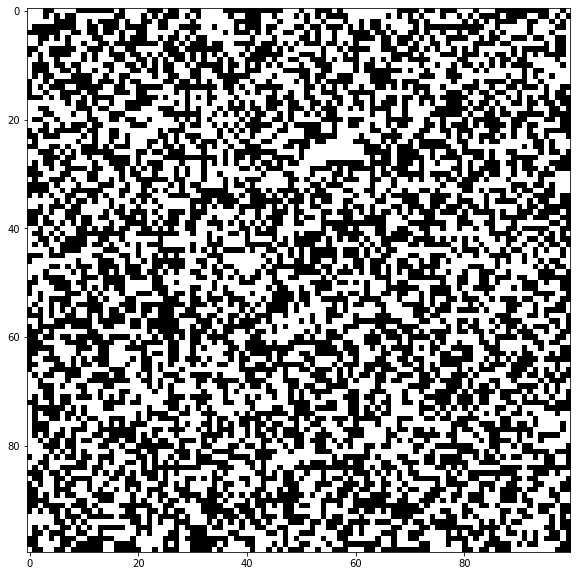

In [10]:
unsatisfied_R[2] = evolution_animation(iterations, 2/8)

### R = $\frac{3}{8}$

Animation of map evolution for R = 0.3750 saved in file schelling_0.3750.gif


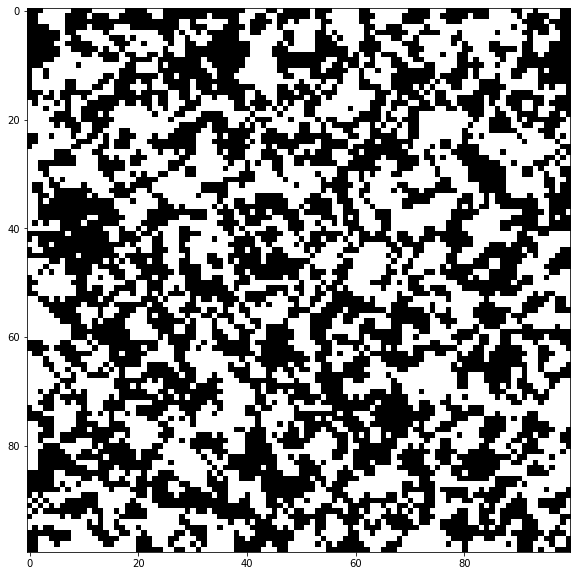

In [11]:
unsatisfied_R[3] = evolution_animation(iterations, 3/8)

### R = $\frac{4}{8}$

Animation of map evolution for R = 0.5000 saved in file schelling_0.5000.gif


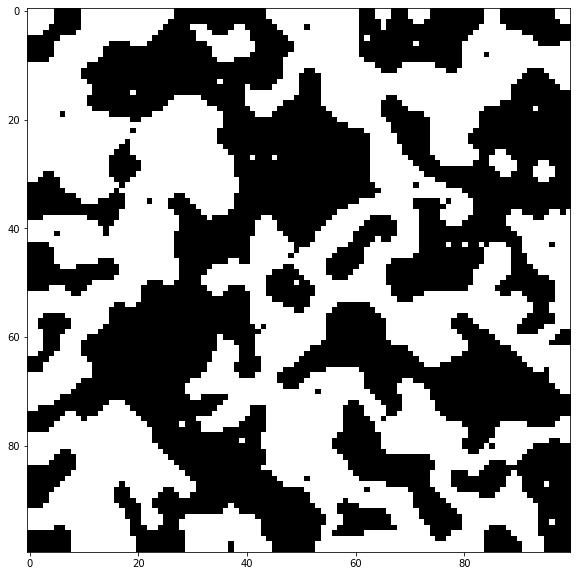

In [12]:
unsatisfied_R[4] = evolution_animation(iterations, 4/8)

### R = $\frac{5}{8}$

Animation of map evolution for R = 0.6250 saved in file schelling_0.6250.gif


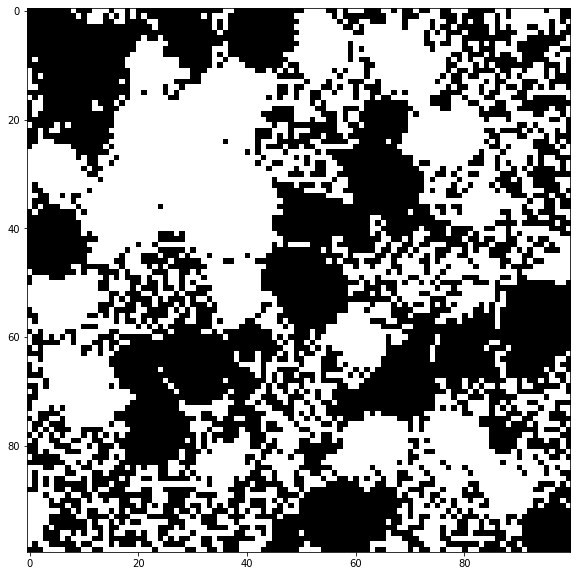

In [13]:
unsatisfied_R[5] = evolution_animation(iterations, 5/8)

### R = $\frac{6}{8}$

Animation of map evolution for R = 0.7500 saved in file schelling_0.7500.gif


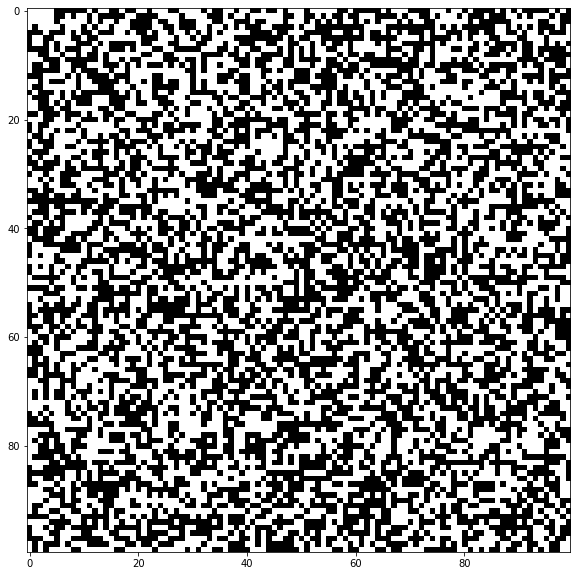

In [14]:
unsatisfied_R[6] = evolution_animation(iterations, 6/8)

### R = $\frac{7}{8}$

Animation of map evolution for R = 0.8750 saved in file schelling_0.8750.gif


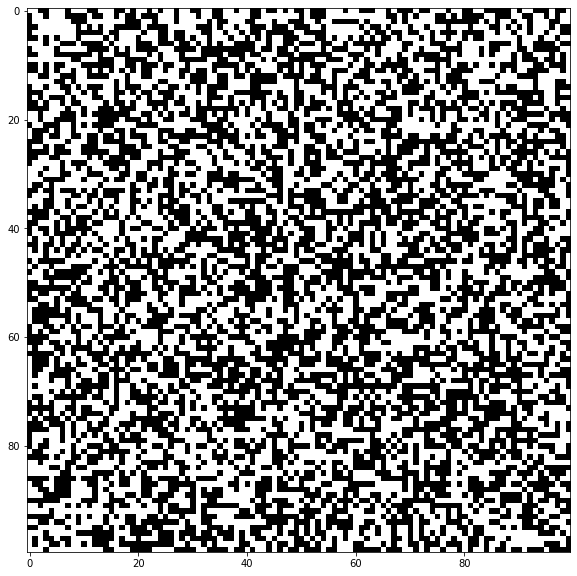

In [15]:
unsatisfied_R[7] = evolution_animation(iterations, 7/8)

### R = 1

Animation of map evolution for R = 1.0000 saved in file schelling_1.0000.gif


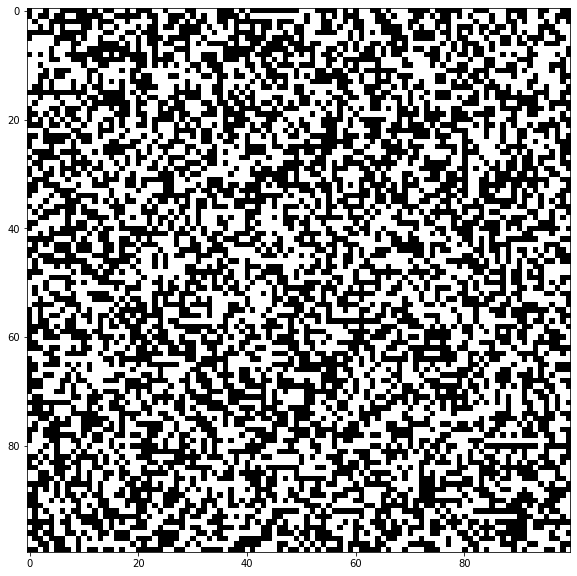

In [16]:
unsatisfied_R[8] = evolution_animation(iterations, 1)

## Households that want to move versus time

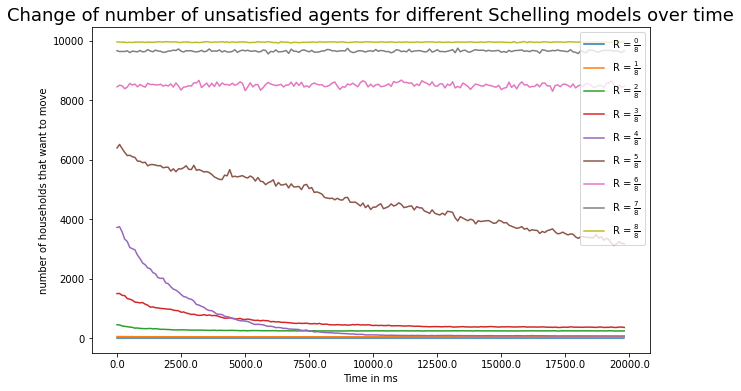

In [17]:
fig, ax = plt.subplots()
for R_key in unsatisfied_R:
    ax.plot(unsatisfied_R[R_key], label=r'R = $\frac{{{}}}{{8}}$'.format(R_key))
    plt.xticks(np.linspace(0, iterations, 9), ["{:.1f}".format(i*gif_duration) for i in np.linspace(0, iterations, 9)])
    
fig.set_size_inches(10, 6, forward=True)
plt.title("Change of number of unsatisfied agents for different Schelling models over time", fontsize=18)
plt.xlabel("Time in ms")
plt.ylabel("number of households that want to move")
plt.legend(loc='upper right')
plt.show()